### Data analysis complete path

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('D:/Brinda DS/Dataset')

In [4]:
df = pd.read_csv('tips.csv')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 2: Check basic dataframe attributes

In [6]:
df.shape

(244, 7)

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [9]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Step 3: Descriptive statistics

In [10]:
# 3a. Seperate cat and con features
cat = df.columns[df.dtypes=='object']
con = df.columns[df.dtypes!='object']

In [11]:
cat

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [12]:
con

Index(['total_bill', 'tip', 'size'], dtype='object')

In [13]:
df[cat].describe().T

,count,unique,top,freq
sex,244,2,Male,157
smoker,244,2,No,151
day,244,4,Sat,87
time,244,2,Dinner,176


In [14]:
df['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [16]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### Step 4: Univariate Analysis
1. Categorial Features - Countplot
2. Continuous Features - Histogram

In [17]:
cat

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [18]:
con

Index(['total_bill', 'tip', 'size'], dtype='object')

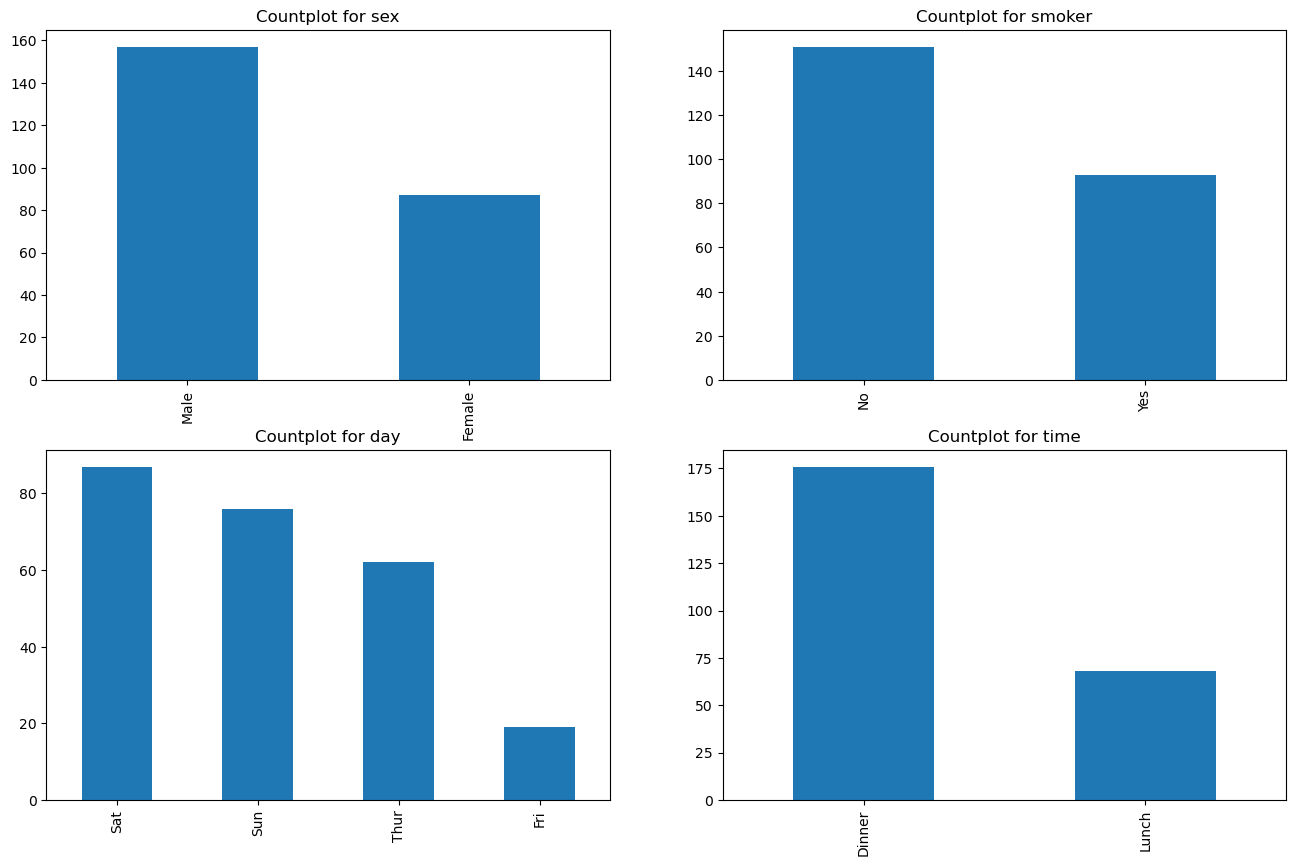

In [19]:
# Cat features subplot
plt.figure(figsize=(16,10))
x=1
for i in cat:
    plt.subplot(2,2,x)
    x = x+1
    df[i].value_counts().plot(kind='bar',title=(f'Countplot for {i}'))
plt.show()

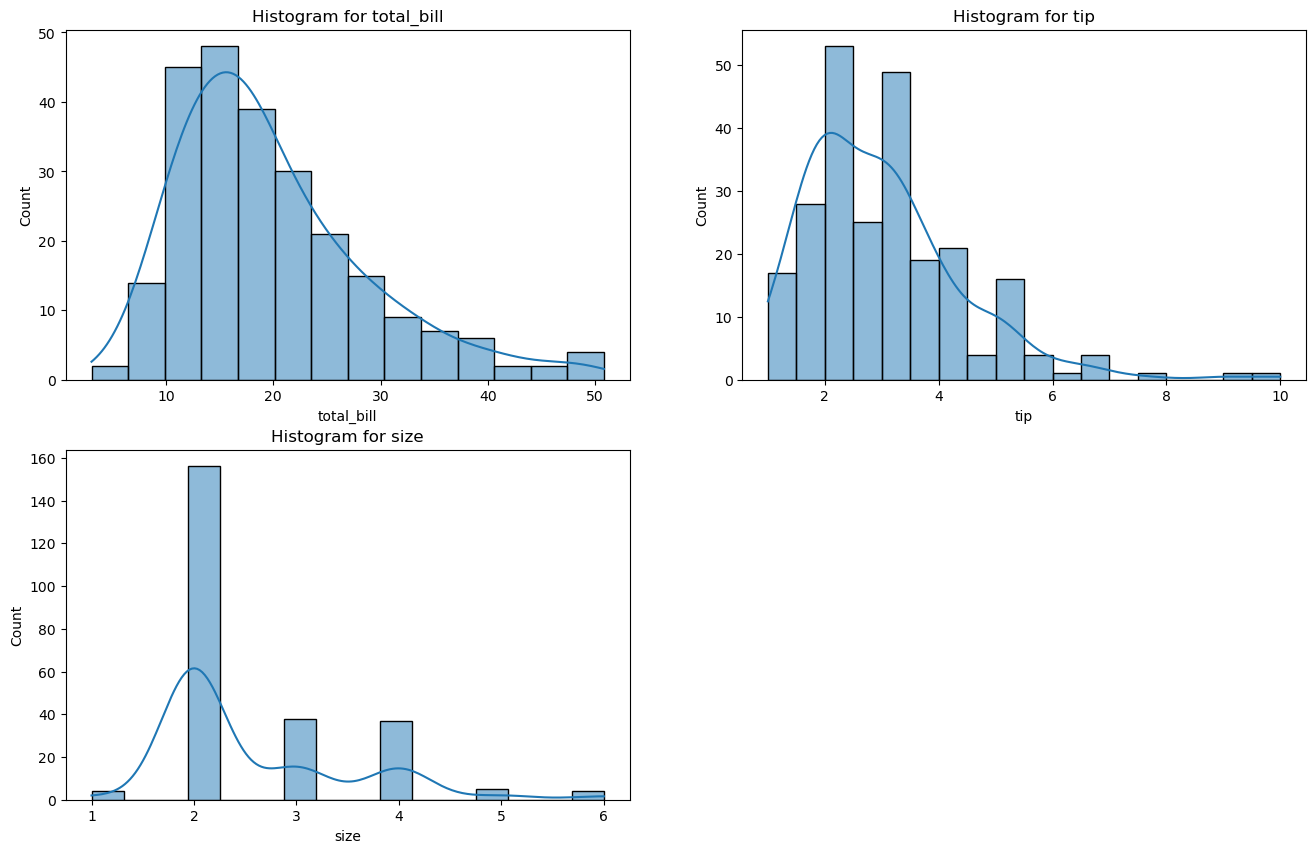

In [20]:
# Continuous features - Histogram
plt.figure(figsize=(16,10))
x= 1
for i in con:
    plt.subplot(2,2,x).set_title(f'Histogram for {i}')
    x = x+1
    sns.histplot(data=df,x=i,kde=True)
plt.show()

### Step 5 : Bivariate analyis
1. Continuous vs Continuous (Scatterplot)
2. Continous vs Categorical (Boxplot)
3. Categorical vs Categorical (Crosstab)

### Scatterplot between Total bill vs Tip

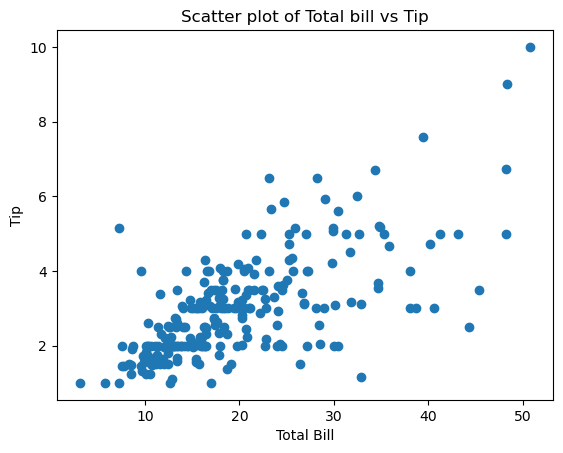

In [21]:
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title(f'Scatter plot of Total bill vs Tip')
plt.show()

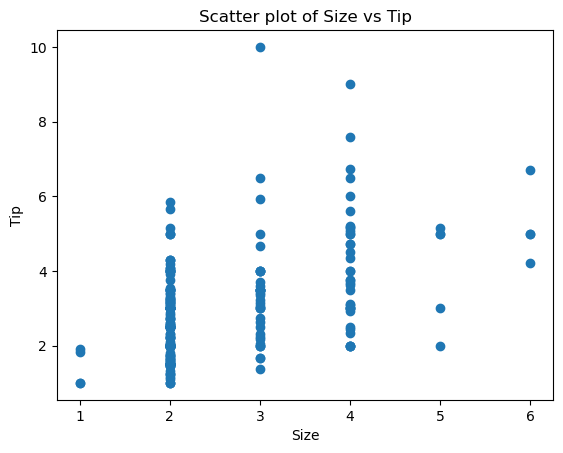

In [22]:
plt.scatter(df['size'],df['tip'])
plt.xlabel('Size')
plt.ylabel('Tip')
plt.title(f'Scatter plot of Size vs Tip')
plt.show()

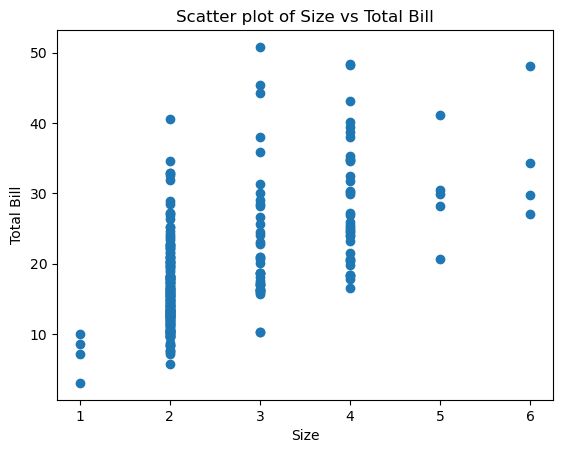

In [23]:
plt.scatter(df['size'],df['total_bill'])
plt.xlabel('Size')
plt.ylabel('Total Bill')
plt.title(f'Scatter plot of Size vs Total Bill')
plt.show()

In [24]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

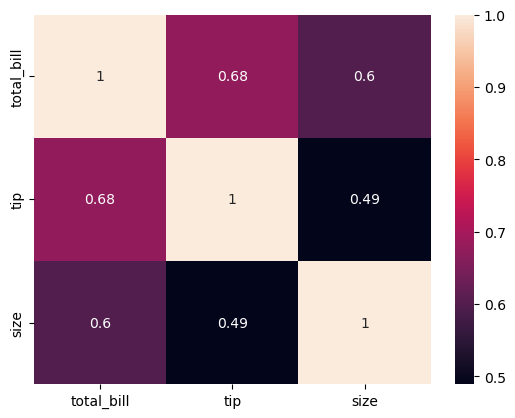

In [25]:
sns.heatmap(df.corr(),annot=True)

### Categorical vs continuous features

In [26]:
cat

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [27]:
con

Index(['total_bill', 'tip', 'size'], dtype='object')

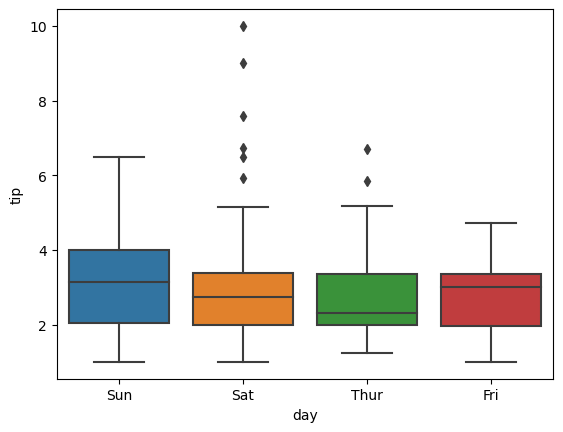

In [28]:
sns.boxplot(data=df,x='day',y='tip')
plt.title = {'Boxplot of day vs tip'}

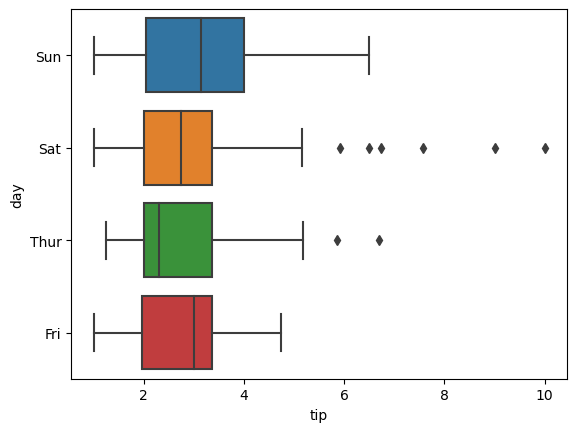

In [29]:
sns.boxplot(data=df,x='tip',y='day')
plt.title = {'Boxplot of day vs tip'}

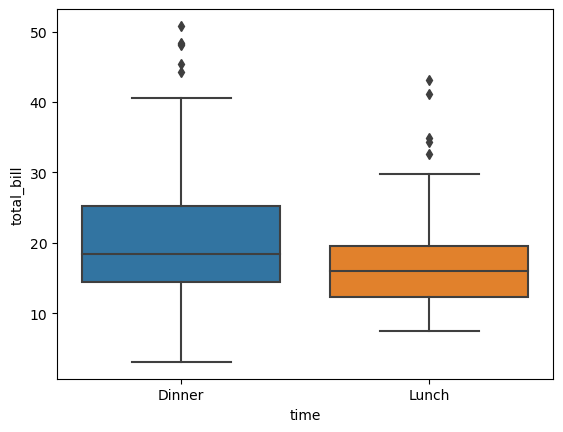

In [30]:
sns.boxplot(data = df,x='time',y = 'total_bill')
plt.title = {'Boxplot of time vs total_bill'}

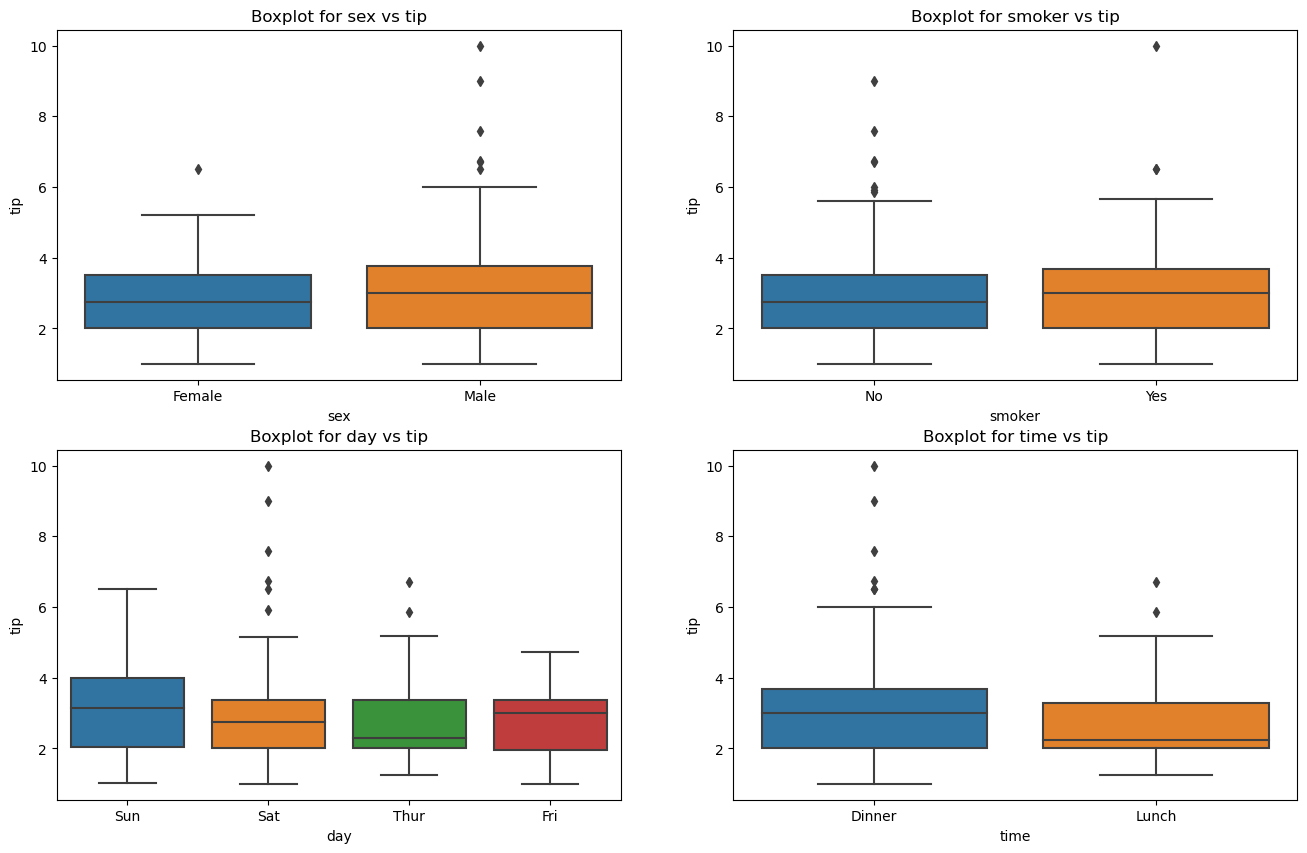

In [31]:
plt.figure(figsize = (16,10))
x = 1
for i in cat:
    plt.subplot(2,2,x).set_title(f'Boxplot for {i} vs tip')
    x = x+1
    sns.boxplot(data = df , x = i,y = 'tip')
    
plt.show()

### Categorical vs Categorical

Crosstab

In [32]:
cat

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [33]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [34]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [35]:
ctab = pd.crosstab(df['day'],df['time'])

In [36]:
ctab

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


<Axes: xlabel='time', ylabel='day'>

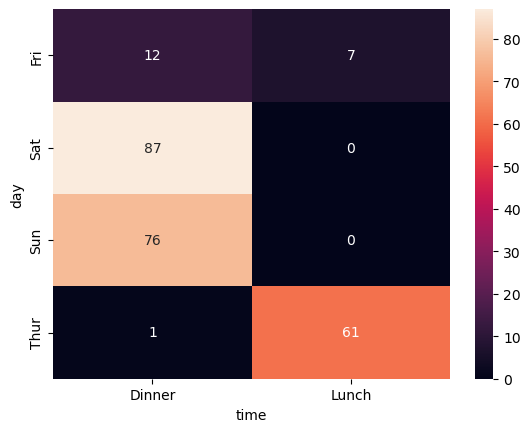

In [37]:
sns.heatmap(ctab,annot = True)

In [38]:
ctab2 = pd.crosstab(df['smoker'],df['day'])

In [39]:
ctab2

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


<Axes: xlabel='day', ylabel='smoker'>

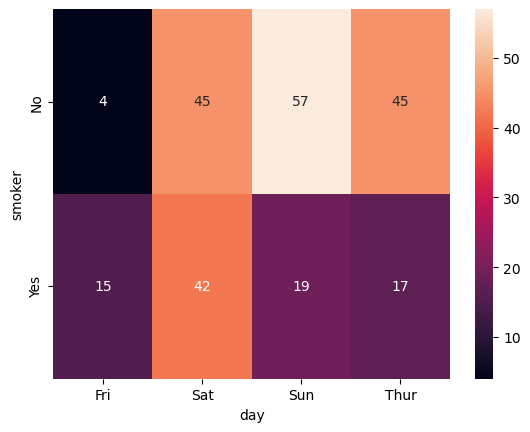

In [40]:
sns.heatmap(ctab2,annot = True)

## Step 6: Multivariate analysis

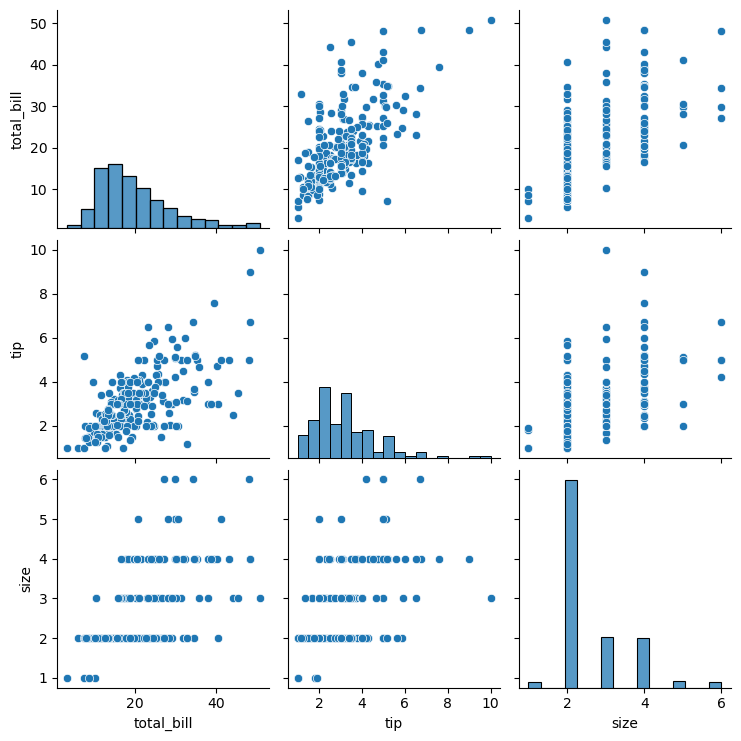

In [41]:
sns.pairplot(df)

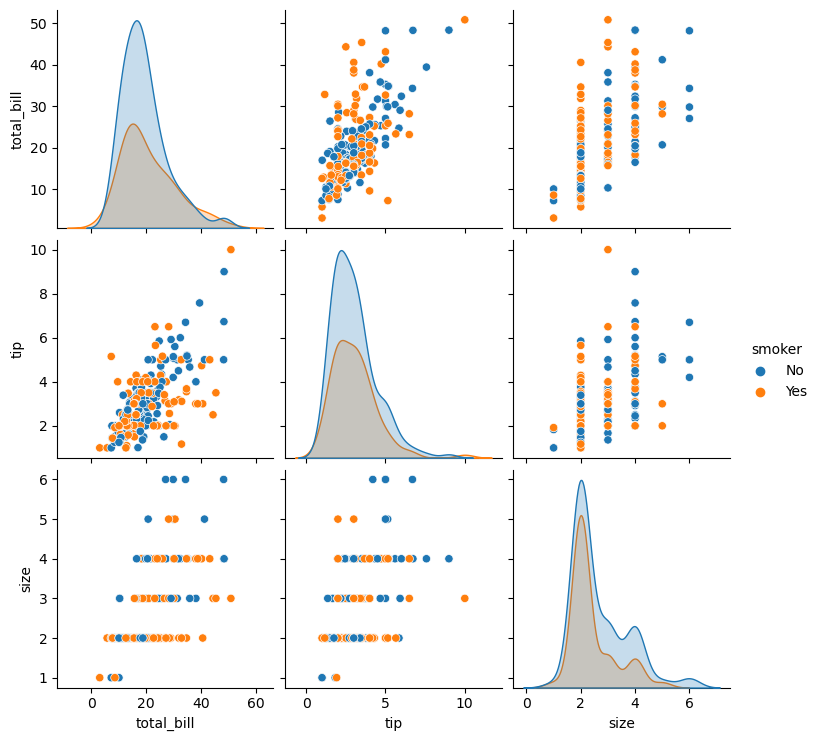

In [42]:
sns.pairplot(df,hue = 'smoker')